# Data Collection

In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')


In [2]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

# Encoding the target variables as 0, 1, 2

In [3]:
lbl_enc = preprocessing.LabelEncoder()

In [4]:
y = lbl_enc.fit_transform(train.author.values)

In [60]:
y

array([0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(train.text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [8]:
ytest.shape

(3916,)

# Text Wrangling

In [10]:
# To create a count matrix, we use count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(analyzer='word', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')

In [12]:
X_train_cv = cv.fit_transform(xtrain)
X_test_cv = cv.transform(xtest)

In [13]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())

In [14]:
word_freq_df

,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,abasement,...,zuro,ædile,ægyptus,æmilianus,æneid,ærial,æronaut,æronauts,æschylus,émeutes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

In [16]:
top_words_df

,0
s,1105
man,614
said,573
time,564
did,556
...,...
invalidism,1
invent,1
inventus,1
inversion,1


In [26]:
testing_predictions = []

In [27]:
for i in range(len(xtest)):
    if predictions[i] == 0:
        testing_predictions.append('EAP')
    elif predictions[i] == 1:
        testing_predictions.append('MWS')
    else:
        testing_predictions.append('HPL')

In [28]:
check_df = pd.DataFrame({'actual_label': list(ytest), 'prediction': testing_predictions, 'text':list(xtest)})

In [29]:
check_df

,actual_label,prediction,text
0,0,EAP,So blended bank and shadow there That each see...
1,0,EAP,"I did only a retail business myself, but my ol..."
2,1,MWS,"Old Waldron, who had curtailed his activities ..."
3,0,EAP,"Let us refer, for example, to the last instanc..."
4,0,EAP,The first intelligence of the murder was broug...
...,...,...,...
3911,1,MWS,"They talked of the old cotter and his wife, of..."
3912,2,HPL,He appeared like the forgotten spirit of the t...
3913,2,HPL,This action of Adrian provoked me.
3914,0,EAP,"All this, it must be acknowledged, was very se..."


In [30]:
check_df.replace(to_replace=0, value='EAP', inplace=True)
check_df.replace(to_replace=1, value='MWS', inplace=True)
check_df.replace(to_replace=2, value='HPL', inplace=True)

In [31]:
check_df

,actual_label,prediction,text
0,EAP,EAP,So blended bank and shadow there That each see...
1,EAP,EAP,"I did only a retail business myself, but my ol..."
2,MWS,MWS,"Old Waldron, who had curtailed his activities ..."
3,EAP,EAP,"Let us refer, for example, to the last instanc..."
4,EAP,EAP,The first intelligence of the murder was broug...
...,...,...,...
3911,MWS,MWS,"They talked of the old cotter and his wife, of..."
3912,HPL,HPL,He appeared like the forgotten spirit of the t...
3913,HPL,HPL,This action of Adrian provoked me.
3914,EAP,EAP,"All this, it must be acknowledged, was very se..."


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
ytest.shape

(3916,)

In [36]:
predictions.shape

(3916,)

In [62]:
cm = confusion_matrix(ytest, predictions,labels=[0, 1, 2])
cm

array([[1277,  100,  203],
       [ 120,  915,   92],
       [ 110,   59, 1040]])

In [39]:
df_cm = pd.DataFrame(cm, range(3), range(3))

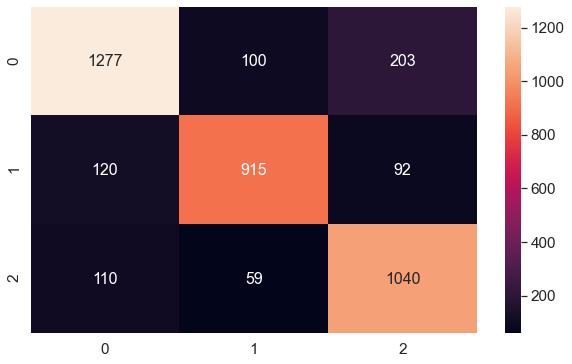

In [40]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

In [ ]:
train['sentences'] = train.text.transform(lambda x: len(sent_tokenize(x)))
train['words'] = train.text.transform(lambda x: len(word_tokenize(x)))
train['text_length'] = train.text.transform(lambda x: len(x))

In [ ]:
text_analize = train.groupby("author")[['sentences','words','text_length']].sum()
text_analize

In [ ]:
stemmer = SnowballStemmer('english')

def text_to_words(text):

    # Convert non-English characters to spaces
    letters_only = re.sub('[^a-zA-Z]', ' ', text)

    # Lowercase conversion
    words = letters_only.lower().split()

    # Convert stopwords to sets.
    stops = set(stopwords.words('english'))

    # Remove Stopwords 
    meaningful_words = [w for w in words if not w in stops]

    # Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]

    # Combining with a space-delimited string
    return( ' '.join(stemming_words) )
train_clean = apply_by_multiprocessing(train['text'], text_to_words, workers=4)

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (19579, 3)
Test  data :  (8392, 2)


In [43]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [45]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()

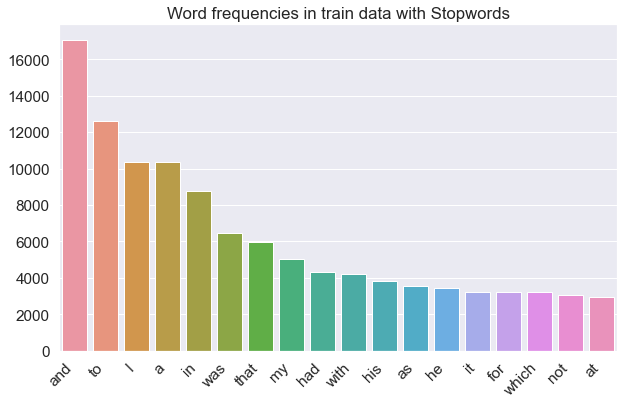

In [55]:
plt.figure(figsize=(10,6))
g = sns.barplot(x = all_words.index.values[2:20],
            y = all_words.values[2:20])
g.set_title('Word frequencies in train data with Stopwords')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')

plt.show()


In [69]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [68]:
## Model 1 - tf-idf frequency
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

In [65]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [66]:
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain) + list(xtest))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xtest)

# Logistic Regression

In [70]:
# Fitting a simple Logistic Regression on TFIDF
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)
predictions
print ("Logistic Regression on TD-IDF log loss: %0.3f " % multiclass_logloss(ytest, predictions))

Logistic Regression on TD-IDF logloss: 0.581 


/Users/padmashneha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
## Instead of using TF-IDF, we can also use word counts as features. This can be done easily using CountVectorizer from scikit-learn.
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

In [74]:
# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(xtrain) + list(xtest))
xtrain_ctv =  ctv.transform(xtrain) 
xtest_ctv = ctv.transform(xtest)

In [75]:
# Fitting a simple Logistic Regression on Counts
clf.fit(xtrain_ctv, ytrain)
predictions = clf.predict_proba(xtest_ctv)
print ("Logistic Regression on Count Vectorizer log loss: %0.3f " % multiclass_logloss(ytest, predictions))

Logistic Regression on Counts logloss: 0.532 


/Users/padmashneha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes

In [77]:
# Fitting a simple Naive Bayes on TFIDF
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)
print ("Naive Bayes on TF-IDF log loss: %0.3f " % multiclass_logloss(ytest, predictions))

Naive Bayes on TF-IDF logloss: 0.584 


In [79]:
# Fitting a simple Naive Bayes on Counts
clf.fit(xtrain_ctv, ytrain)
predictions = clf.predict_proba(xtest_ctv)
print ("Naive Bayes on Count Vectorizer log loss: %0.3f " % multiclass_logloss(ytest, predictions))

Naive Bayes on Counts logloss: 0.460 


# XGBoost

In [81]:
# Fitting a simple xgboost on tf-idf
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_ctv.tocsc(), ytrain)
predictions = clf.predict_proba(xtest_ctv.tocsc())
print ("XGBoost on TF-IDF log loss: %0.3f " % multiclass_logloss(ytest, predictions))

XGBoost on TF-IDF logloss: 0.775 


In [82]:
# Fitting a simple xgboost on Counts
clf.fit(xtrain_ctv, ytrain)
predictions = clf.predict_proba(xtest_ctv.tocsc())
print ("XGBoost on Count Vectorizer log loss: %0.3f " % multiclass_logloss(ytest, predictions))

XGBoost on TF-IDF logloss: 0.775 


# Support Vector Machine

In [83]:
## Support vector machine
## using singular value decomposition to reduce the number of features
svd = decomposition.TruncatedSVD(n_components=150)

In [84]:
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xvalid_svd = svd.transform(xvalid_tfv)

In [85]:
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xvalid_svd_scl = scl.transform(xvalid_svd)

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1.0, probability=True) # since we need probabilities
clf.fit(xtrain_svd_scl, ytrain)
predictions = clf.predict_proba(xvalid_svd_scl)
print ("SVM on TFIDF log loss: %0.3f " % multiclass_logloss(ytest, predictions))

In [ ]:
svd.fit(xtrain_cv)
xtrain_svd = svd.transform(xtrain_cv)
xvalid_svd = svd.transform(xtest_cv)

In [ ]:
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xvalid_svd_scl = scl.transform(xvalid_svd)

In [ ]:
clf = SVC(C=1.0, probability=True) # since we need probabilities
clf.fit(xtrain_svd_scl, ytrain)
predictions = clf.predict_proba(xvalid_svd_scl)

In [ ]:
print("SVM on Count Vectorizer log loss: %0.3f " % multiclass_logloss(ytest, predictions))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [ ]:
naive_bayes.fit(X_train_cv, ytrain)
predictions = naive_bayes.predict(X_test_cv)
predictions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy score: ', accuracy_score(ytest, predictions))